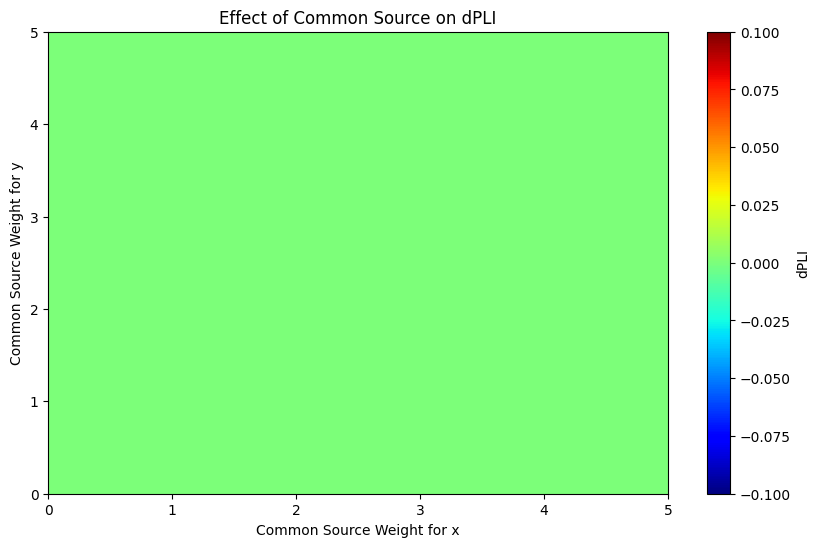

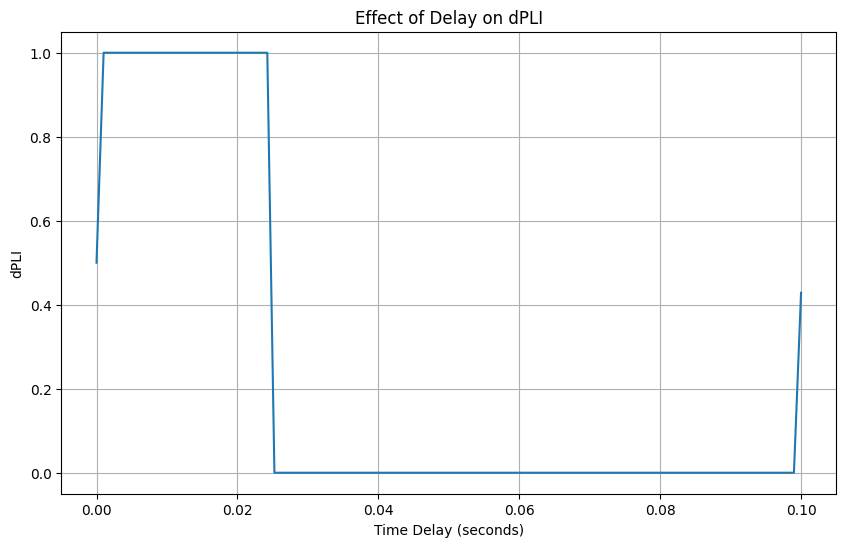

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert

def heaviside(x):
    return np.heaviside(x, 0.5)

def calculateDPLI(signal1, signal2):
    analytic_signal1 = hilbert(signal1)
    analytic_signal2 = hilbert(signal2)
    
    phase_1 = np.angle(analytic_signal1)
    phase_2 = np.angle(analytic_signal2)
    phase_diff = np.unwrap(phase_1 - phase_2)
    
    dpli_value = np.abs(np.mean(heaviside(phase_diff)))
    return dpli_value

def effectdelay_DPLI(x_signal, t, fs):
    dpli_values = []
    for t0 in np.linspace(0, 0.1, 100):
        y_delayed = np.sin(2 * np.pi * fs * (t - t0))
        dpli_values.append(calculateDPLI(x_signal, y_delayed))
    return dpli_values

def effectCM_DPLI(x_signal, y_signal, cm_signal):
    dpli_matrix = []
    for a in np.linspace(0, 5, 50):
        row = []
        for b in np.linspace(0, 5, 50):
            xc = x_signal + a * cm_signal
            yc = y_signal + b * cm_signal
            row.append(calculateDPLI(yc, xc))
        dpli_matrix.append(row)
    return dpli_matrix


fs = 1000 
T = 1     
N = T * fs 
t = np.linspace(0, T, N, endpoint=False)

f1,f2 = 10,10
x_signal = np.sin(2 * np.pi * f1 * t)
y_signal = np.sin(2 * np.pi * f2 * (t-1/500))


plt.figure(figsize=(10, 6))
cm_dpli = effectCM_DPLI(x_signal, y_signal, x_signal)
plt.imshow(cm_dpli, cmap='jet', extent=[0, 5, 0, 5], origin='lower', aspect='auto')
plt.colorbar(label="dPLI")
plt.title("Effect of Common Source on dPLI")
plt.xlabel("Common Source Weight for x")
plt.ylabel("Common Source Weight for y")
plt.show()

# Plotting Effect of Delay
plt.figure(figsize=(10, 6))
delay_dpli = effectdelay_DPLI(x_signal, t, f1)
plt.plot(np.linspace(0, 0.1, 100), delay_dpli, label="dPLI vs Delay")
plt.title("Effect of Delay on dPLI")
plt.xlabel("Time Delay (seconds)")
plt.ylabel("dPLI")
plt.grid()
plt.show()


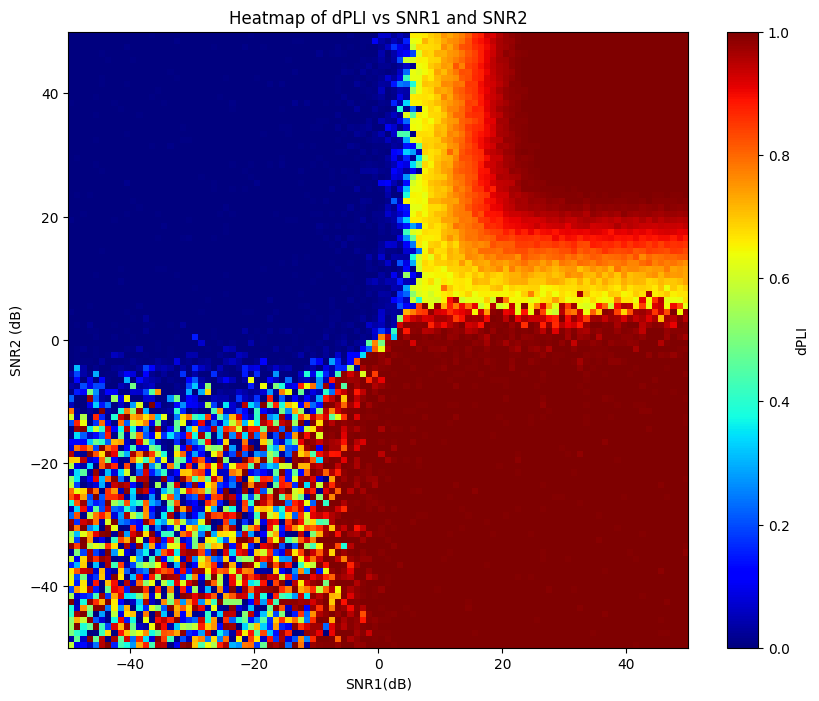

In [51]:
f1,f2 = 10,10
signal1 = np.sin(2 * np.pi * f1 * t)
signal2 = np.sin(2 * np.pi * f2 * (t-1/500))


def add_noise(signal, snr_db):
    signal_power = np.mean(signal ** 2)
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))
    return signal + noise



snr_values = np.linspace(-50, 50, 100)
dpli_matrix = np.zeros((len(snr_values), len(snr_values)))
for i, snr1 in enumerate(snr_values):
    for j, snr2 in enumerate(snr_values):
        noisy_signal1 = add_noise(signal1, snr1)
        noisy_signal2 = add_noise(signal2, snr2)
        dpli_matrix[i, j] = calculateDPLI(noisy_signal1, noisy_signal2)

plt.figure(figsize=(10, 8))
plt.imshow(dpli_matrix, extent=[snr_values[0], snr_values[-1], snr_values[0], snr_values[-1]], origin='lower', cmap='jet', aspect='auto')
plt.colorbar(label='dPLI')
plt.title('Heatmap of dPLI vs SNR1 and SNR2')
plt.xlabel('SNR1(dB)')
plt.ylabel('SNR2 (dB)')
plt.show()


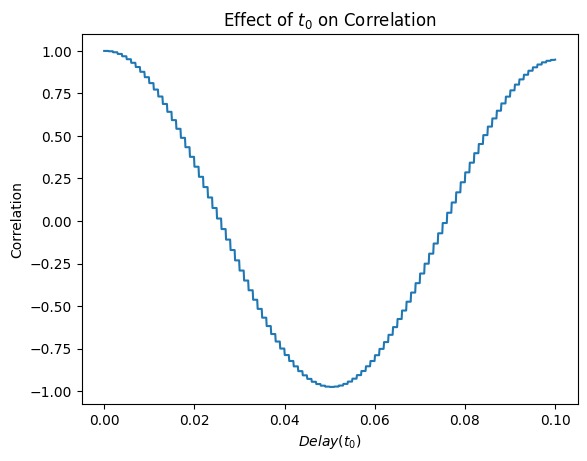

In [52]:

def calculate_correlation(signal1, signal2):
    corr_matrix = np.corrcoef(signal1, signal2)
    return corr_matrix[0, 1]

def delay_signal(signal, delay, sr):
    ns = int(delay * sr)
    delayed_signal = np.roll(signal, ns)
    delayed_signal[:ns] = 0  
    return delayed_signal

def effectt0_correlation(x_signal, y_signal, fs):
    corre = []
    delays = np.linspace(0, 0.1, 1000)
    for t0 in delays:
        y_signal_delay = delay_signal(y_signal, t0, fs)
        corre.append(calculate_correlation(x_signal, y_signal_delay))
    return delays, corre
fs = 1000  
T = 1     
N = T * fs 

t1 = np.linspace(0, T, N)
f1 = 10
signal1 = np.sin(2 * np.pi * f1 *t1) 
signal2 = np.sin(2 * np.pi * f1 * t1)  

delays,correlations = effectt0_correlation(signal1, signal2, fs)
plt.plot(delays, correlations)
plt.xlabel('$Delay (t_0)$')
plt.ylabel('Correlation')
plt.title('Effect of $t_0$ on Correlation')
plt.show()


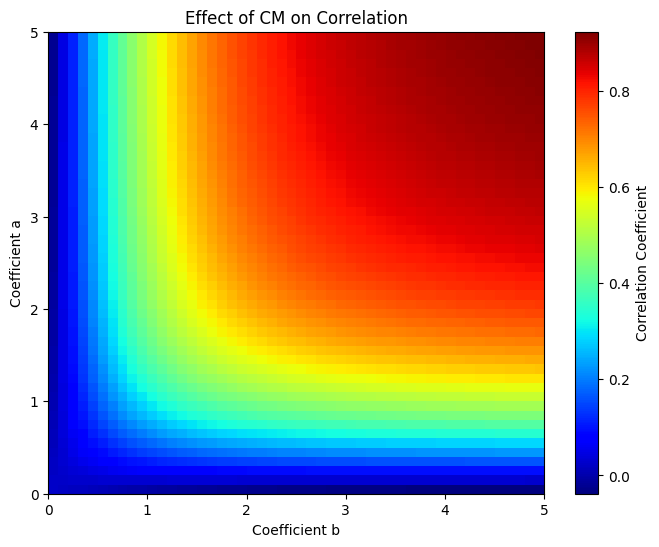

In [53]:
def effectCM_correlation(x_signal, y_signal, CM):
    corre = []
    for a in np.linspace(0, 5, 50):  
        row = []
        for b in np.linspace(0, 5, 50): 
            xc_signal = x_signal + a * CM
            yc_signal = y_signal + b * CM
            row.append(calculate_correlation(yc_signal, xc_signal))
        corre.append(row)
    return corre

fs = 1000   
T = 1       
N = T * fs  
mean = 0     
std = 1  
noise_signal1 = np.random.normal(mean, std, N)  
noise_signal2 = np.random.normal(mean, std, N)  
f_cm = 5 
t = np.linspace(0, T, N)
C_signal = np.sin(2 * np.pi * f_cm * t)

correlation_matrix = effectCM_correlation(noise_signal1, noise_signal2, C_signal)

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='jet', extent=[0, 5, 0, 5], origin='lower', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xlabel('Coefficient b')
plt.ylabel('Coefficient a')
plt.title('Effect of CM on Correlation')
plt.show()


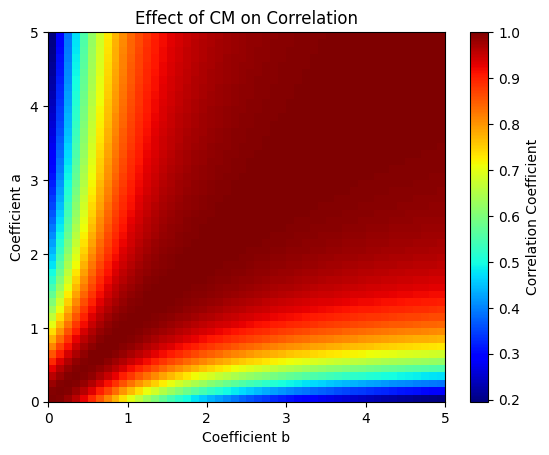

In [54]:

def effectCM_correlation(x_signal, y_signal, CM):
    corre = []
    for a in np.linspace(0, 5, 50):  
        row = []
        for b in np.linspace(0, 5, 50): 
            xc_signal = x_signal + a * CM
            yc_signal = y_signal + b * CM
            row.append(calculate_correlation(yc_signal, xc_signal))
        corre.append(row)
    return corre

fs = 1000   
T = 1       
N = T * fs  
t = np.linspace(0, 1, 1000)
signal1 =  np.sin(2 * np.pi * fs * t)
signal2 = np.sin(2 * np.pi * fs * (t))
f_cm = 5 
t = np.linspace(0, T, N, endpoint=False)
C_signal = np.sin(2 * np.pi * f_cm * t)
correlation_matrix = effectCM_correlation(signal1,signal2, C_signal)

plt.imshow(correlation_matrix, cmap='jet', extent=[0, 5, 0, 5], origin='lower', aspect='auto')
plt.colorbar(label='Correlation Coefficient')
plt.xlabel('Coefficient b')
plt.ylabel('Coefficient a')
plt.title('Effect of CM on Correlation')
plt.show()


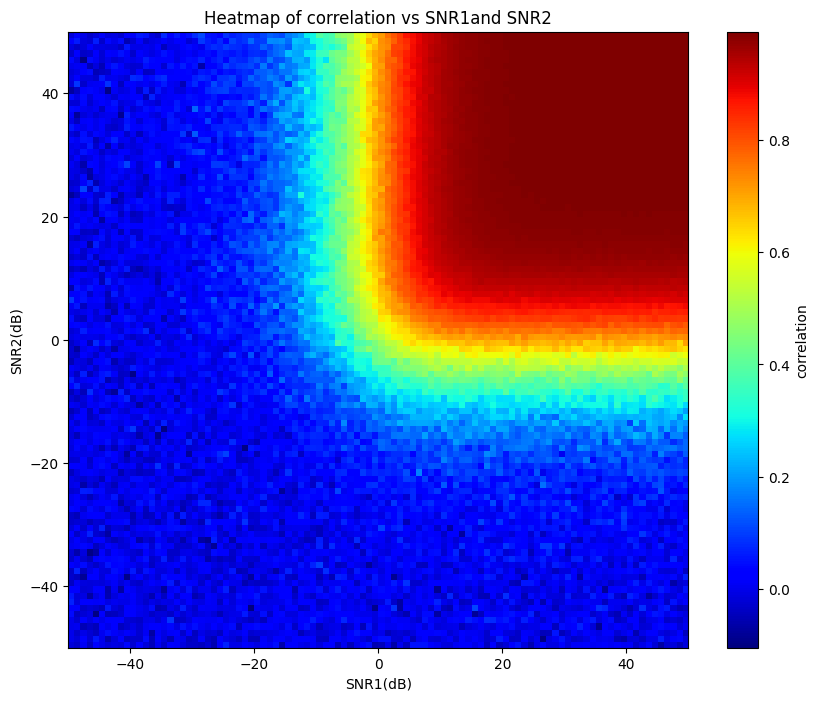

In [55]:


fs = 1000 
T = 1     
N = T * fs 
t = np.linspace(0, T, N)
f1,f2 = 10,10

signal1 = np.sin(2 * np.pi * f1 * t)
signal2 = np.sin(2 * np.pi * f2 * (t-1/500))

def add_noise(signal, snr_db):
    signal_power = np.mean(signal ** 2)
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))
    return signal + noise

def calculate_correlation(signal1, signal2):
    mean1 = np.mean(signal1)
    mean2 = np.mean(signal2)
    Cov = np.sum((signal1 - mean1) * (signal2 - mean2))
    sigma1sigma2 = np.sqrt(np.sum((signal1 - mean1)**2) * np.sum((signal2 - mean2)**2))
    if sigma1sigma2 == 0:
        return 0.0
    return Cov / sigma1sigma2

snr_values = np.linspace(-50, 50, 100)
dpli_matrix = np.zeros((len(snr_values), len(snr_values)))

for i, snr1 in enumerate(snr_values):
    for j, snr2 in enumerate(snr_values):
        noisy_signal1 = add_noise(signal1,snr1)
        noisy_signal2 =add_noise(signal2, snr2)
        dpli_matrix[i, j] = calculate_correlation(noisy_signal1, noisy_signal2)

plt.figure(figsize=(10, 8))
plt.imshow(dpli_matrix, extent=[snr_values[0], snr_values[-1], snr_values[0], snr_values[-1]], origin='lower', cmap='jet', aspect='auto')
plt.colorbar(label='correlation')
plt.title('Heatmap of correlation vs SNR1and SNR2')
plt.xlabel('SNR1(dB)')
plt.ylabel('SNR2(dB)')
plt.show()


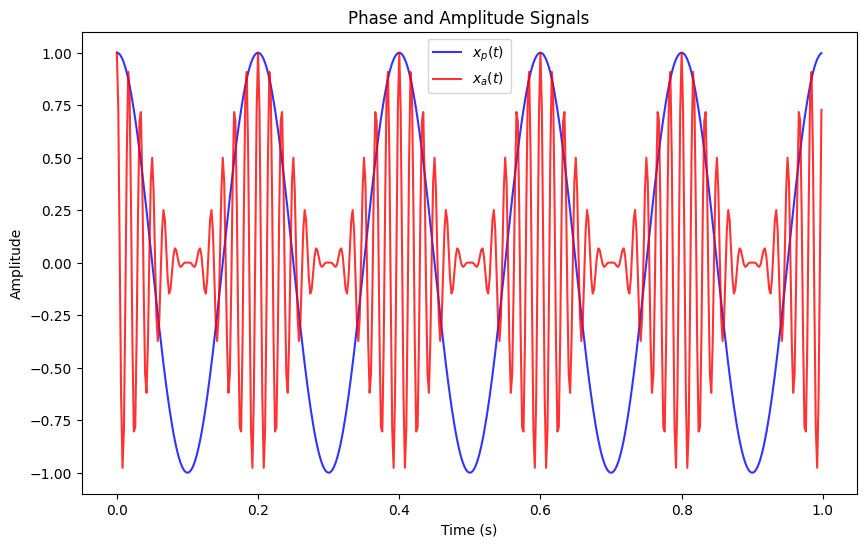

In [56]:


def create_signals(kp, ka, f_phase, f_amp, chi, sigma_n, fs=500, duration=1):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    n1 = np.random.normal(0, 1, len(t))  
    n2 = np.random.normal(0, 1, len(t)) 

    x_p = kp * np.cos(2 * np.pi * f_phase * t) + sigma_n * n1
    am = ((1 - chi) * np.cos(2 * np.pi * f_phase * t) + (chi + 1)) / 2
    x_a = ka * am * np.cos(2 * np.pi * f_amp * t) + sigma_n * n2
    return t, x_p, x_a

kp = 1
ka = 1
f_phase = 5 
f_amp = 60  
chi = 0
sigma_n = 0
fs = 500 
t, x_p,x_a = create_signals(kp, ka,f_phase, f_amp, chi,sigma_n, fs)

plt.figure(figsize=(10, 6))
plt.plot(t, x_p, label='$x_p(t)$', alpha=0.8,color='b')
plt.plot(t, x_a, label='$x_a(t)$ ', alpha=0.8,color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Phase and Amplitude Signals')
plt.legend()
plt.show()


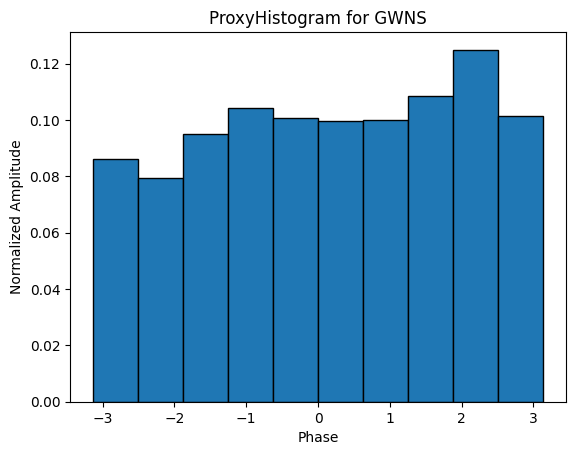

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def ProxyHistogram(points, num_bins):

    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    
    bin_edges = np.linspace(-np.pi, np.pi, num_bins + 1)
    bin_indices = np.digitize(x, bin_edges, right=True)
    bin_sums = np.zeros(num_bins)
    for i in range(1, num_bins + 1):
        bin_sums[i - 1] = np.sum(y[bin_indices == i])
    
    total_sum = np.sum(bin_sums)
    normalized_amplitudes = bin_sums / total_sum if total_sum > 0 else bin_sums
    
    return bin_edges, normalized_amplitudes

phases = np.array([np.pi/9, 4*np.pi/7, np.pi, -np.pi/8, 7*np.pi/11, 0, -2*np.pi/5, -3*np.pi/4, -5*np.pi/14, np.pi/12])
amplitudes = np.array([0.8, 0.25, 0.1, 0.7, 0.6, 0.95, 0.4, 0.14, 0.35, 0.9])
points = list(zip(phases, amplitudes))
num_bins = 3

bin_edges, normalized_amplitudes = ProxyHistogram(points, num_bins)


np.random.seed(42)  
num_samples = 1000
signal1 = np.random.normal(0, 1, num_samples)
signal2 = np.random.normal(0, 1, num_samples)

phases = np.angle(signal1 + 1j * signal2)  
amplitudes = np.sqrt(signal1**2 + signal2**2)  

noise_points = list(zip(phases, amplitudes))

num_bins_noise = 10
bin_edges_noise, normalized_amplitudes_noise = ProxyHistogram(noise_points, num_bins_noise)
bin_centers = (bin_edges_noise[:-1] + bin_edges_noise[1:]) / 2
plt.bar(bin_centers, normalized_amplitudes_noise, width=np.diff(bin_edges_noise), align='center', edgecolor='k')
plt.xlabel("Phase")
plt.ylabel("Normalized Amplitude")
plt.title("ProxyHistogram for GWNS")
plt.show()


In [58]:
import pywt

def DKL(X, P, Q):
    dkl = 0
    for x in X:
        if P[x] > 0 and Q[x] > 0: 
            dkl += P[x] * np.log2(P[x] / Q[x])
    return dkl

gaussian_1 = np.random.normal(loc=0, scale=1, size=10000)
gaussian_2 = np.random.normal(loc=2.5, scale=1, size=10000)
uniform_1 = np.random.uniform(low=-1, high=1, size=10000)
uniform_2 = np.random.uniform(low=-1.5, high=1.5, size=10000)

bins = np.linspace(-3, 3, 50)
P_gaussian_1, _ = np.histogram(gaussian_1, bins=bins, density=True)
P_gaussian_2, _ = np.histogram(gaussian_2, bins=bins, density=True)
P_uniform_1, _ = np.histogram(uniform_1, bins=bins, density=True)
P_uniform_2, _ = np.histogram(uniform_2, bins=bins, density=True)

P_gaussian_1 /= np.sum(P_gaussian_1)
P_gaussian_2 /= np.sum(P_gaussian_2)
P_uniform_1 /= np.sum(P_uniform_1)
P_uniform_2 /= np.sum(P_uniform_2)

X = range(len(bins) - 1)

dkl_gaussian = DKL(X, P_gaussian_1, P_gaussian_2)
dkl_uniform = DKL(X, P_uniform_1, P_uniform_2)
dkl_mixed_1 = DKL(X, P_gaussian_1, P_uniform_2)
dkl_mixed_2 = DKL(X, P_uniform_1, P_gaussian_1)
dkl_mixed_3 = DKL(X, P_uniform_2, P_gaussian_1)
dkl_mixed_4 = DKL(X, P_uniform_1, P_gaussian_2)
dkl_mixed_5 = DKL(X, P_uniform_2, P_gaussian_2)
print(f"DKL(Gaussian_1 || Gaussian_2) = {dkl_gaussian:.4f}")
print(f"DKL(Uniform_1 || Uniform_2) = {dkl_uniform:.4f}")
print(f"DKL(Gaussian_1 || Uniform_2) = {dkl_mixed_1:.4f}")
print(f"DKL(Uniform_1 || Gaussian_1) = {dkl_mixed_2:.4f}")
print(f"DKL(Uniform_2 || Gaussian_1) = {dkl_mixed_3:.4f}")
print(f"DKL(Uniform_1 || Gaussian_2) = {dkl_mixed_4:.4f}")
print(f"DKL(Uniform_2 || Gaussian_2) = {dkl_mixed_5:.4f}")


DKL(Gaussian_1 || Gaussian_2) = 2.6852
DKL(Uniform_1 || Uniform_2) = 0.5585
DKL(Gaussian_1 || Uniform_2) = -0.1076
DKL(Uniform_1 || Gaussian_1) = 0.5217
DKL(Uniform_2 || Gaussian_1) = 0.2587
DKL(Uniform_1 || Gaussian_2) = 4.1615
DKL(Uniform_2 || Gaussian_2) = 3.1157


In [59]:
def wavelet_transform(signal, fs, freq_range, wavelet='cmor1.5-0.5'):
    frequencies = np.linspace(freq_range[0], freq_range[1], 100)
    scales = pywt.scale2frequency(wavelet, 1) / frequencies * fs
    coefficients, freqs = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)
    return coefficients, freqs


def ModulationIndex(phase_matrix, amplitude_matrix, num_bins):
    points = [
        (phase_matrix[f, t], amplitude_matrix[f, t])
        for t in range(phase_matrix.shape[1])
        for f in range(phase_matrix.shape[0])
    ]
    _, normalized_amplitudes = ProxyHistogram(points, num_bins)
    uniform_distribution = np.ones(num_bins) / num_bins
    PAC = DKL(normalized_amplitudes, uniform_distribution) / np.log2(num_bins)
    return PAC

def ProxyHistogram(points, num_bins):
    x = np.array([p[0] for p in points])
    y = np.array([p[1] for p in points])
    bin_edges = np.linspace(-np.pi, np.pi, num_bins + 1)
    bin_indices = np.digitize(x, bin_edges, right=False) - 1
    bin_sums = np.zeros(num_bins)
    for i in range(num_bins):
        bin_sums[i] = np.sum(y[bin_indices == i])
    total_sum = np.sum(bin_sums)
    normalized_amplitudes = bin_sums / total_sum if total_sum > 0 else np.zeros(num_bins)
    return bin_edges, normalized_amplitudes

def DKL(P, Q):
    P = np.array(P, dtype=np.float64) / np.sum(P)
    Q = np.array(Q, dtype=np.float64) / np.sum(Q)
    dkl = np.sum(P * np.log2(P / Q))
    return dkl


def MVL(phase_matrix, amplitude_matrix):
    pac_matrix = np.zeros((amplitude_matrix.shape[0], phase_matrix.shape[0]))
    for n in range(amplitude_matrix.shape[0]):
        for m in range(phase_matrix.shape[0]):
            complex_vector = amplitude_matrix[n, :] * np.exp(1j * phase_matrix[m, :])
            pac_matrix[n, m] = np.abs(np.mean(complex_vector))
    return pac_matrix

def create_signals(kp, ka, f_phase, f_amp, chi, sigma_n, fs=500, duration=1):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    n1 = np.random.normal(0, 1, len(t))  
    n2 = np.random.normal(0, 1, len(t)) 
    x_p = kp * np.cos(2 * np.pi * f_phase * t) + sigma_n * n1
    amplitude_modulation = ((1 - chi) * np.cos(2 * np.pi * f_phase * t) + (chi + 1)) / 2
    x_a = ka * amplitude_modulation * np.cos(2 * np.pi * f_amp * t) + sigma_n * n2

    return t, x_p, x_a

def compute_phase_amplitude(signal_p, signal_a, fs):
    phase_coeffs, phase_freqs = wavelet_transform(signal_p, fs, [2, 12])
    phase_matrix = np.angle(phase_coeffs)
    amp_coeffs, amp_freqs = wavelet_transform(signal_a, fs, [20, 80])
    amplitude_matrix = np.abs(amp_coeffs)
    return phase_matrix, amplitude_matrix, phase_freqs, amp_freqs

def plot_comodulogram(PAC_matrix, method, chi_or_sigma, phase_freqs, amp_freqs, variable_name="$\chi$"):
    plt.figure(figsize=(8, 6))
    plt.imshow(PAC_matrix, aspect='auto', cmap='jet', extent=[phase_freqs[0], phase_freqs[-1], amp_freqs[-1], amp_freqs[0]])
    plt.colorbar(label=f'PAC ({method})')
    plt.xlabel('Phase Frequencies (Hz)')
    plt.ylabel('Amplitude Frequencies (Hz)')
    plt.title(f'Comodulogram ({method}){variable_name}| {chi_or_sigma}')
    plt.gca().invert_yaxis()
    plt.show()


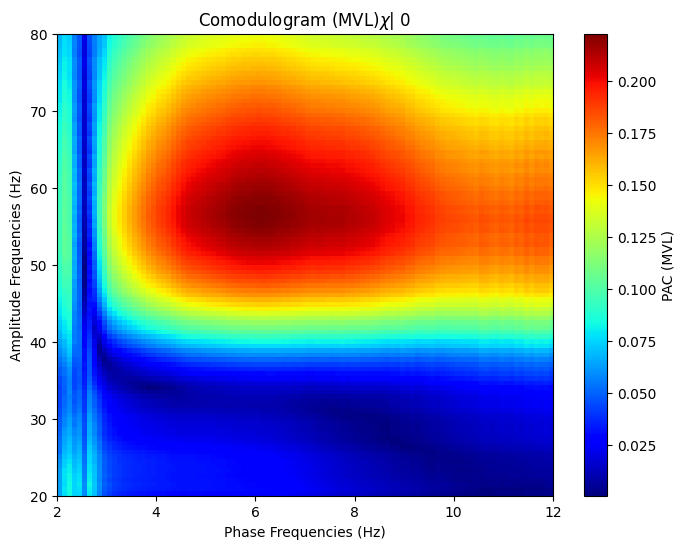

0.019586688777359917


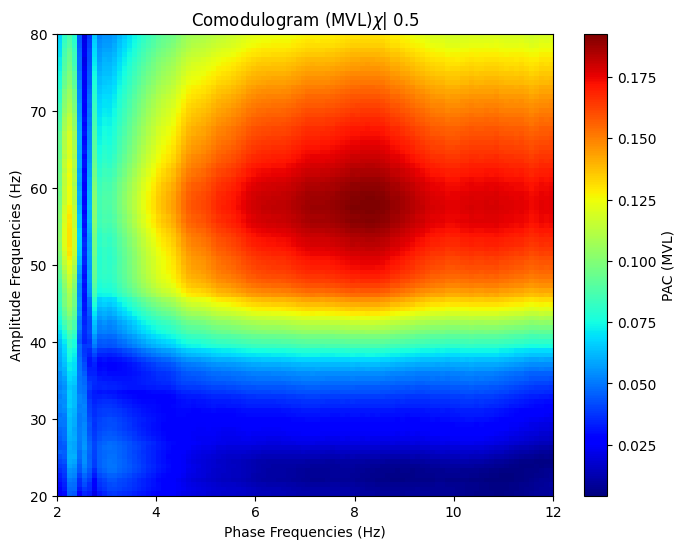

0.012014368502657387


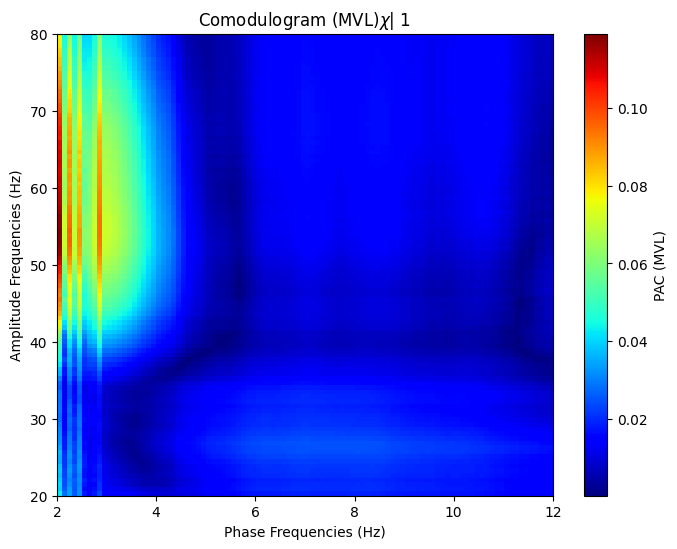

0.0012750047035577359


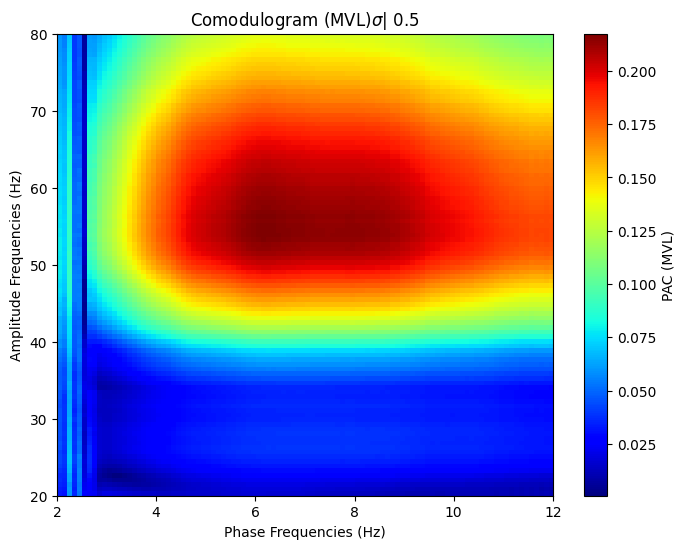

0.029122722515271208


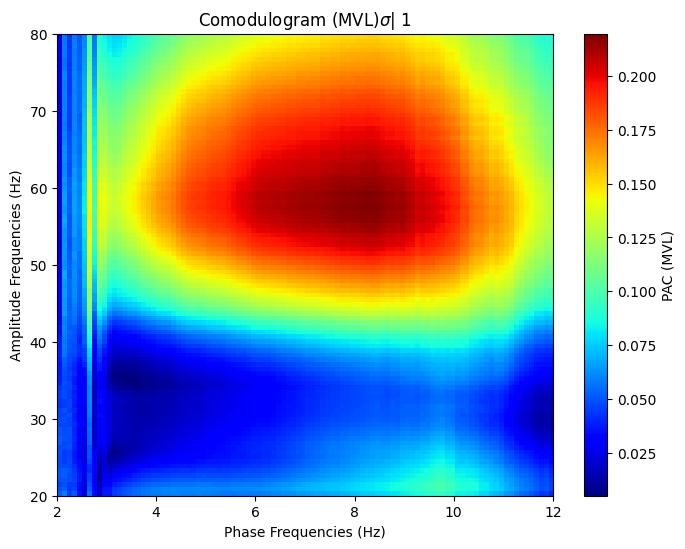

0.01140274131269005


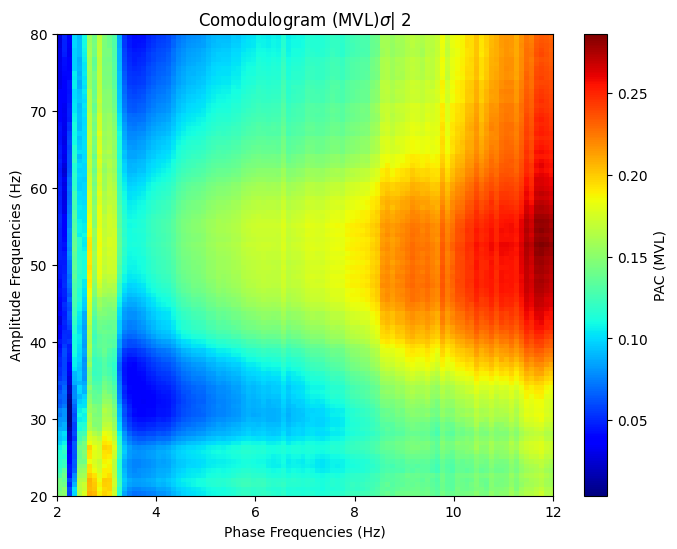

0.008327661382232215


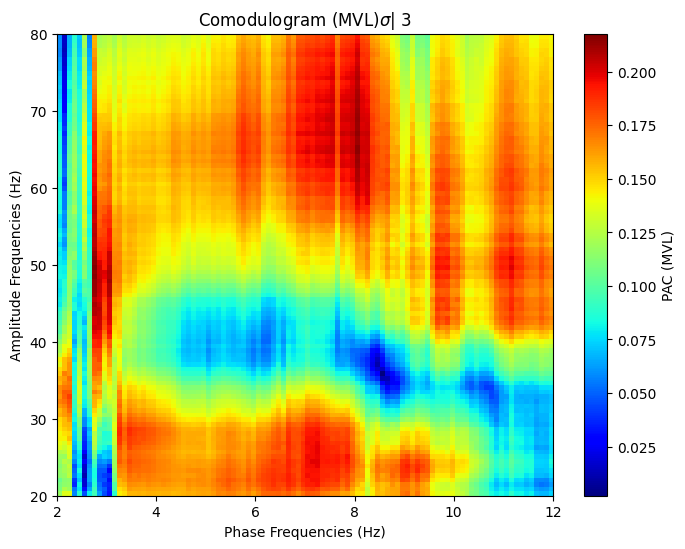

0.0028005802995926888


In [60]:

kp = 1
ka = 1
f_phase = 5
f_amp = 60
fs = 500
duration = 1


chi_values = [0, 0.5, 1]
for chi in chi_values:
    t, x_p, x_a = create_signals(kp, ka, f_phase, f_amp, chi, sigma_n=0.5, fs=fs, duration=duration)
    phase_matrix, amplitude_matrix, phase_freqs, amp_freqs = compute_phase_amplitude(x_p, x_a, fs)
    PAC_MI = ModulationIndex(phase_matrix, amplitude_matrix, num_bins=18)
    PAC_MVL = MVL(phase_matrix, amplitude_matrix)
    plot_comodulogram(PAC_MVL, "MVL", chi, phase_freqs, amp_freqs, variable_name=r"$\chi$")
    print(PAC_MI)




sigma_values = [0.5, 1, 2, 3]
chi = 0
for sigma_n in sigma_values:
    t, x_p, x_a = create_signals(kp, ka, f_phase, f_amp, chi, sigma_n=sigma_n, fs=fs, duration=duration)
    phase_matrix, amplitude_matrix, phase_freqs, amp_freqs = compute_phase_amplitude(x_p, x_a, fs)
    PAC_MI = ModulationIndex(phase_matrix, amplitude_matrix, num_bins=18)
    PAC_MVL = MVL(phase_matrix, amplitude_matrix)
    plot_comodulogram(PAC_MVL, "MVL", sigma_n, phase_freqs, amp_freqs, variable_name=r"$\sigma$")
    print(PAC_MI)




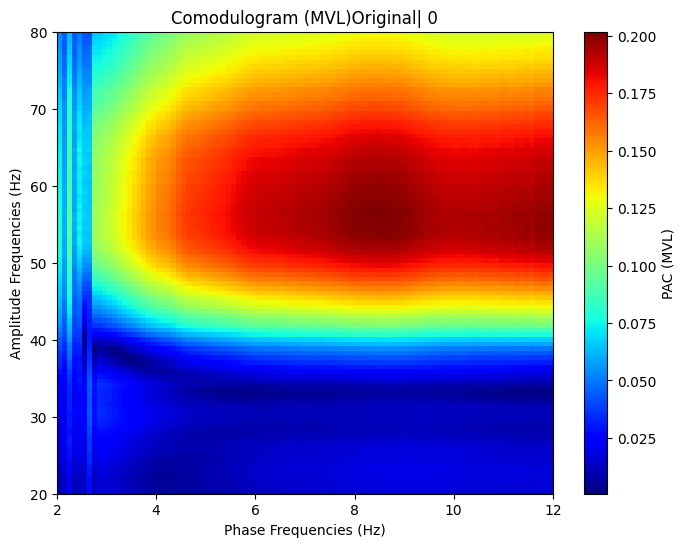

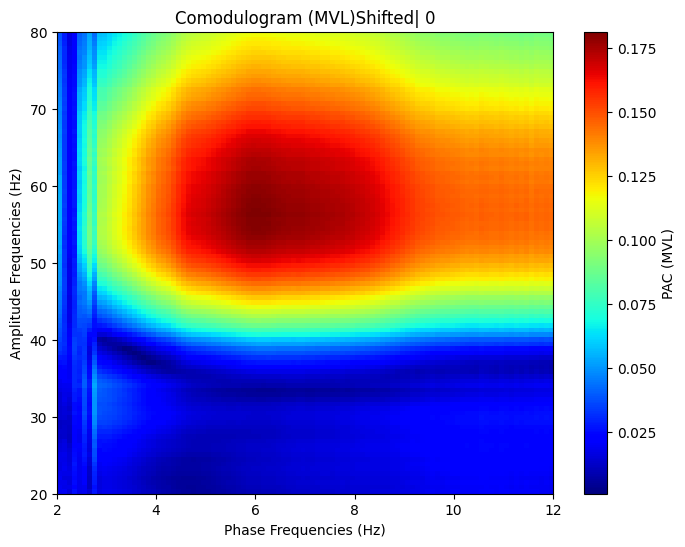

 0.023693907587512483
0.015216958546354502


In [61]:
def circular_shift(signal, shift_ms, fs):
    shift_samples = int(shift_ms / 1000 * fs)
    return np.roll(signal, shift_samples)

kp = 1
ka = 1
f_phase = 5
f_amp = 60
fs = 500
duration = 1
chi = 0
sigma_n = 0.5


t, x_p, x_a = create_signals(kp, ka, f_phase, f_amp, chi, sigma_n, fs=fs, duration=duration)
shift_ms = 100
x_p_shifted = circular_shift(x_p, shift_ms, fs)
x_a_shifted = circular_shift(x_a, shift_ms, fs)

phase_matrix, amplitude_matrix, phase_freqs, amp_freqs = compute_phase_amplitude(x_p, x_a, fs)
PAC_MI_original = ModulationIndex(phase_matrix, amplitude_matrix, num_bins=18)
PAC_MVL_original = MVL(phase_matrix, amplitude_matrix)
plot_comodulogram(PAC_MVL_original, "MVL", 0, phase_freqs, amp_freqs, variable_name="Original")

phase_matrix_shifted, amplitude_matrix_shifted, _, _ = compute_phase_amplitude(x_p_shifted, x_a, fs)
PAC_MI_shifted = ModulationIndex(phase_matrix_shifted, amplitude_matrix_shifted, num_bins=18)
PAC_MVL_shifted = MVL(phase_matrix_shifted, amplitude_matrix_shifted)
plot_comodulogram(PAC_MVL_shifted, "MVL", 0, phase_freqs, amp_freqs, variable_name="Shifted")


print(f" {PAC_MI_original}")
print(f"{PAC_MI_shifted}")


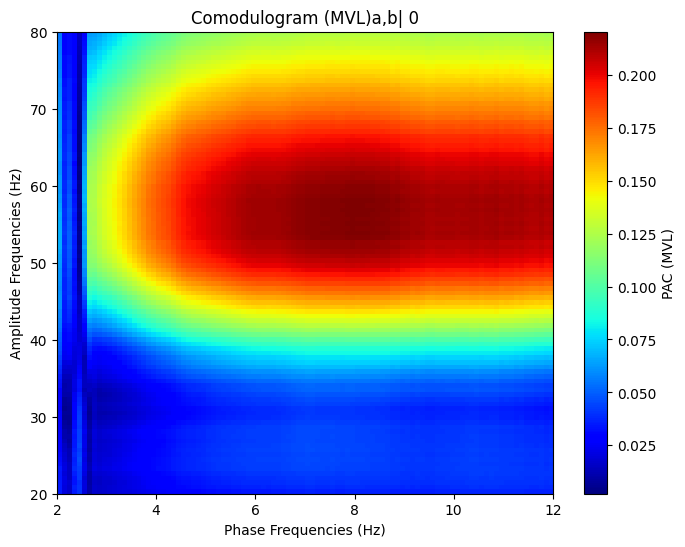

0.03440370165214621


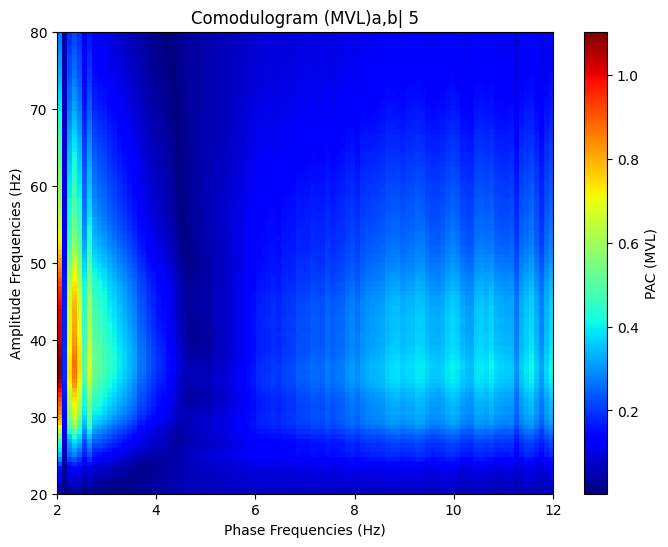

0.000533909296810431


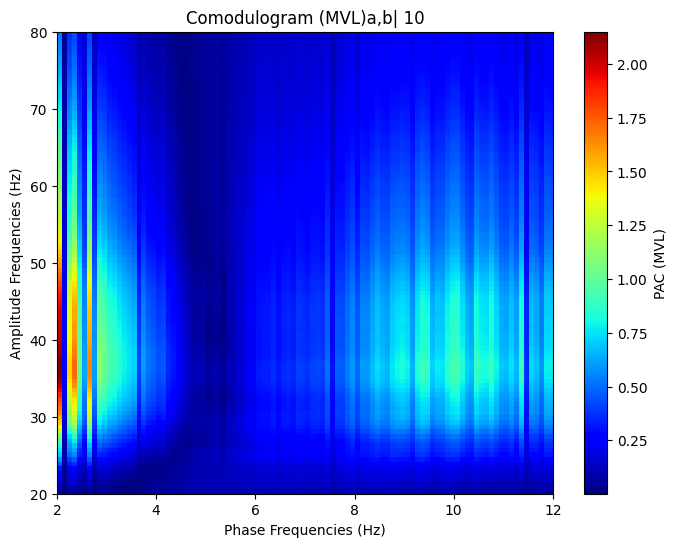

0.00042989748691589616


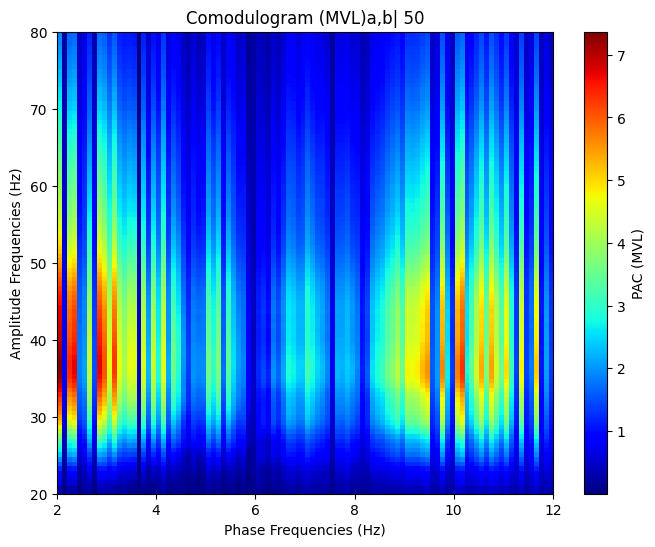

0.015850337028229144


In [62]:

kp = 1
ka = 1
f_phase = 5
f_amp = 60
chi = 0
sigma_n = 0.5
fs = 500
duration = 1
f_c = 40
a_bvalues = [0,5,10,50]
def add_cs(x_p, x_a, alpha, beta, f_c, t):
    common_term = np.cos(2 * np.pi * f_c * t)
    x_p_c = x_p + alpha * common_term
    x_a_c = x_a + beta * common_term
    return x_p_c,x_a_c    
t, x_p, x_a = create_signals(kp, ka, f_phase, f_amp, chi, sigma_n, fs=fs, duration=duration)
for a_b in a_bvalues:
    x_p_c, x_a_c = add_cs(x_p, x_a, a_b, a_b, f_c, t)
    phase_matrix, amplitude_matrix, phase_freqs, amp_freqs = compute_phase_amplitude(x_p_c, x_a_c, fs)
    PAC_MI = ModulationIndex(phase_matrix, amplitude_matrix, num_bins=18)
    PAC_MVL = MVL(phase_matrix, amplitude_matrix)
    plot_comodulogram(PAC_MVL, "MVL", a_b, phase_freqs, amp_freqs, variable_name="a,b")
    print(f"{PAC_MI}")
